# Trabalho 2 - Operações de Vizinhança

## 1) Sobel e Roberts

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

roberts_x = np.array([[-1, 0], [0, 1]])
roberts_y = np.array([[0, -1], [1, 0]])

## 2) Filtros passa baixa 3x3 e 7x7

Definindo imagem e operações:

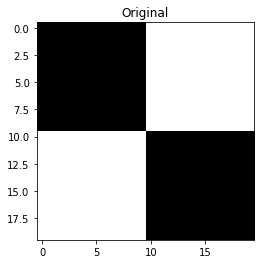

In [2]:
image = np.array([
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


def passa_baixa(size):
	return np.array([[1.0/(size ** 2)] * size] * size)


def operacao_vizinhanca(img, neigh, min_value=0, max_value=255):
	resp = np.zeros(img.shape[:2])
	Imx = img.shape[0]
	Imy = img.shape[1]
	Nx = neigh.shape[0]
	Ny = neigh.shape[1]

	# Ignorando as bordas
	for x in range(Nx // 2):
		for y in range(Imy):
			resp[x, y] = img[x, y]
			resp[Imx - x - 1, y] = img[Imx - x - 1, y]
	for x in range(Imx):
		for y in range(Ny // 2):
			resp[x, y] = img[x, y]
			resp[x, Imy - y - 1] = img[x, Imy - y - 1]

	for x in range(Nx // 2, img.shape[0] - Nx // 2):
		for y in range(Ny // 2, image.shape[1] - Ny // 2):
			resp[x, y] = 0
			for i in range(Nx):
				for j in range(Ny):
					resp[x, y] += img[x - Nx // 2 + i, y - Ny // 2 + j] * neigh[i, j]
			resp[x, y] = int(max(min_value, min(resp[x, y], max_value)))

	return np.uint8(resp)

def show_image(img, title=''):
	plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
	plt.title(title)
	plt.show()

show_image(image, 'Original')

Passa baixa 3x3.

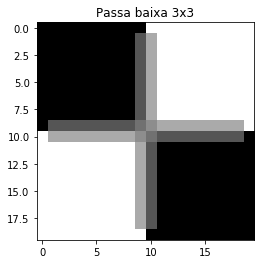

In [3]:
show_image(operacao_vizinhanca(image, passa_baixa(3)), 'Passa baixa 3x3')

Passa baixa 7x7.

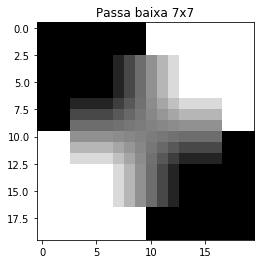

In [4]:
show_image(operacao_vizinhanca(image, passa_baixa(7)), 'Passa baixa 7x7')

## 3) Novos filtros

a) Filtro Norte

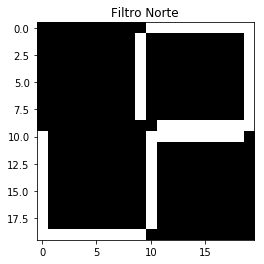

In [5]:
filtro_a_norte = np.array([[1, 1, 1], [1, -2, 1], [-1, -1, -1]])
show_image(operacao_vizinhanca(image, filtro_a_norte), 'Filtro Norte')

b) Filtro Sul

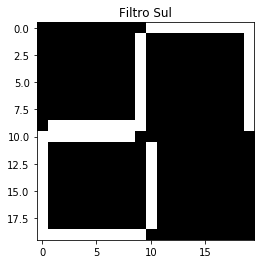

In [6]:
filtro_b_sul = np.array([[-1, -1, -1], [1, -2, 1], [1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_b_sul), "Filtro Sul")

c) Filtro Leste

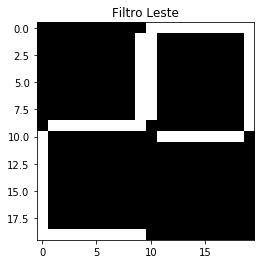

In [7]:
filtro_c_leste = np.array([[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_c_leste), 'Filtro Leste')

d) Filtro Sudeste

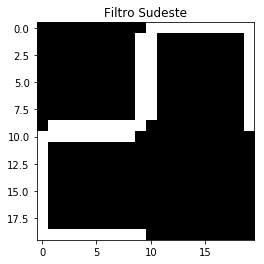

In [8]:
filtro_d_sudeste = np.array([[-1, -1, 1], [-1, -2, 1], [1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_d_sudeste), 'Filtro Sudeste')